# [Classification] : US Election 2020

<사용 되는 데이터>
1. 대통령 투표 결과 : president_county_candidate.csv
2. 카운티 지사 투표 결과 : governors_county_candidate.csv
3. 상원의원 투표 결과 : senate_county_candidate.csv
4. 하원의원 투표 결과 : house_candidate.csv

- [메인 source] : https://www.kaggle.com/unanimad/us-election-2020?sel=
- [보조 source] : https://www.kaggle.com/muonneutrino/us-census-demographic-data?select=acs2017_census_tract_data.csv

------------------

In [141]:
!pip install geopandas==0.8.1
!pip install pyshp==2.1.2
!pip install shapely==1.7.1
!pip install plotly-geo==1.0.0

  Using cached Fiona-1.8.19.tar.gz (1.3 MB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)
  Using cached Fiona-1.8.16.tar.gz (1.3 MB)
  Using cached Fiona-1.8.15.tar.gz (1.3 MB)
  Using cached Fiona-1.8.14.tar.gz (1.3 MB)
  Using cached Fiona-1.8.13.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.13.tar.gz (1.2 MB)
  Using cached Fiona-1.8.12.tar.gz (1.2 MB)
  Using cached Fiona-1.8.11.tar.gz (1.2 MB)
  Using cached Fiona-1.8.10.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post2.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.tar.gz (1.2 MB)
  Using cached Fiona-1.8.8.tar.gz (1.7 MB)
  Using cached Fiona-1.8.7.tar.gz (1.7 MB)
  Using cached Fiona-1.8.6.tar.gz (1.7 MB)
  Using cached Fiona-1.8.5.tar.gz (1.7 MB)
  Using cached Fiona-1.8.4.tar.gz (1.1 MB)
  Using cached Fiona-1.8.3.tar.gz (1.1 MB)
  Using cached Fiona-1.8.2.tar.gz (1.2 MB)
  Using cached Fiona-1.8.1.tar.gz (1.1 MB)
  Using cached Fiona-1.8.

    ERROR: Command errored out with exit status 1:
     command: 'c:\users\44455\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\44455\\AppData\\Local\\Temp\\pip-install-rqcyi7ld\\fiona_14aa16ff80c446a0a66db6188745689b\\setup.py'"'"'; __file__='"'"'C:\\Users\\44455\\AppData\\Local\\Temp\\pip-install-rqcyi7ld\\fiona_14aa16ff80c446a0a66db6188745689b\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\44455\AppData\Local\Temp\pip-pip-egg-info-7yc18wbg'
         cwd: C:\Users\44455\AppData\Local\Temp\pip-install-rqcyi7ld\fiona_14aa16ff80c446a0a66db6188745689b\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
    ERRO

  error: command 'C:\\Users\\44455\\anaconda3\\Library\\mingw-w64\\bin\\gcc.exe' failed with exit status 1
  ----------------------------------------
  ERROR: Failed building wheel for fiona
    ERROR: Command errored out with exit status 1:
     command: 'c:\users\44455\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\44455\\AppData\\Local\\Temp\\pip-install-rqcyi7ld\\fiona_7807f6ee5c5349da8e1c016192d3c8d0\\setup.py'"'"'; __file__='"'"'C:\\Users\\44455\\AppData\\Local\\Temp\\pip-install-rqcyi7ld\\fiona_7807f6ee5c5349da8e1c016192d3c8d0\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\44455\AppData\Local\Temp\pip-record-xro30eox\install-record.txt' --single-version-externally-managed --compile --install-headers 'c:\users\44455\anaconda3\Include\fiona'
         cwd: C:\Users\44455\AppData\Loca

  Created wheel for pyshp: filename=pyshp-2.1.2-py3-none-any.whl size=36221 sha256=28a9d66acf8eb7c54c4ea659c1272bf076d64af4848c5be692f2ed2205442c85
  Stored in directory: c:\users\44455\appdata\local\pip\cache\wheels\49\29\69\6b6a800e28c596146549d22f4e1013abfcbb466cd179e586d3
Successfully built pyshp
  Attempting uninstall: pyshp
    Found existing installation: pyshp 2.1.3
    Uninstalling pyshp-2.1.3:
      Successfully uninstalled pyshp-2.1.3


You should consider upgrading via the 'c:\users\44455\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\44455\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\44455\anaconda3\python.exe -m pip install --upgrade pip' command.


# 1. 모듈 및 데이터 호출

In [286]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
# from US Election 2020
df_pres = pd.read_csv('./data/president_county_candidate.csv')
df_gov = pd.read_csv('./data/governors_county_candidate.csv')
df_sen = pd.read_csv('./data/senate_county_candidate.csv')
df_hou = pd.read_csv('./data/house_candidate.csv')


# from US Census 2017
df_census = pd.read_csv('./data/acs2017_county_data.csv')

# 보조 데이터 2
state_code = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes?query=United%20States%20of%20America&afdToken=ChMIlt-LpsHT8AIV1wSICh1WGAP8ElHcHWDqMct02e-oOwXR9de-YIub12XnmwOshbHVaE868Tva8fdM_0sG9ICXM3svtJ8bZe_TlAtNqNuVpyDLuUwT67P2TOlFqLFo0wPHDsUVNYM&pcsa=false&nb=0&nm=31&nx=258&ny=17&is=659x374&clkt=96&bg=!V1SlVBDNAAZ7hX_Ue4U7ACkA7BJNWaNI_V0njKs-wFcyK_X55fxkTXyR0LE0p5HRtg4LFDmkzjOGCgIAAAAgUgAAABBoAQcKAJHlJbbfiYYtKhQ1aeuU4f4OcF8JhCMZhexQLSMpOR4NHT8360-sVNQL5CmyrJ4PceLcFJRBXUHlr3pp5IeZz4Z5XyLCGuKCAetXBz4jd6ylMlxK6OObeJLp0i7V0zMLv8DxKpABm4jmONe_iPYUIe-uls6iYt4Rti5U-F60agS5m4SGlsvGr1PFBYi-U-PFHZTpmQHGaanfIBVs_7zPVKPYLYWK4XSofwp8DpxB2U8h3AXACTbXVrL68NRnAovIv6b4sVekPqPYW6_cr0S6GzMjAoPT3BoMscAUPhGBNX9JoRRyvnlC4y5Y3pr0azZnT5TZiI_TeKVquAidr4c8Ca1L6kb3t6O60EFM3ueIfjqTwCaZ9voTDNXNSnMYG5TMYLle5k8osi2OshaSyQIAt2aPpGfB8ihmYuNHYrUcRovmVvWYM3lkGELl9HFyULzbmJPA50m5rmCSz1tSkAb1CZ0_UUD-8hccEpE4d6KkYqZYjuaefZDzeczbHAr35BmmFpmLNNq7oSYurqrfFjeVgEnk6a1jvMl-dEbtJFqRm-uBuPcXKUMM6dcE5ugm3m_yz_VKxeEDV9IKJM4ZKQco2O5SdnEKgLo4PI5Xf3J57mUD-MM3YFpsZ7rWDu4T8lgVyI3Rr8f56DeKmdOVPlQdeSN9rJ_2V9PvdbP7NQP45LRi_FHS_ES00xnov2LQeouLdfyU232RxpChftKtSLPyo6RybhFCKM96lgfjjS7i9QrPXdlbHd9xVDqRjroHIZqyboX9cn9XEQcKFzzZI-vxJBCfOm8jFkL4byLZNg')[0]

<데이터 스키마>
- state : 주
- county : 카운티
- district : 지구
- cnadidate : 후보자
- party : 후보자 소속 정당
- total_votes : 상임위원 투표 결과
- won : 지역 투표 우승 여부

------------------

# 2. EDA 및 데이터 기초 통계 분석

In [288]:
df_pres.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [289]:
df_pres['candidate'].value_counts().head(10)

Joe Biden             4633
Donald Trump          4633
Jo Jorgensen          4633
 Write-ins            3792
Howie Hawkins         2994
Rocky De La Fuente    1562
Don Blankenship       1317
Brock Pierce          1124
Kanye West            1082
Gloria La Riva        1028
Name: candidate, dtype: int64

In [290]:
# 칸예 웨스트 득표수
df_pres.loc[df_pres['candidate'] == 'Kanye West']['total_votes'].sum()

66367

In [291]:
df_gov.head()

,state,county,candidate,party,votes,won
0,Delaware,Kent County,John Carney,DEM,44352,True
1,Delaware,Kent County,Julianne Murray,REP,39332,False
2,Delaware,Kent County,Kathy DeMatteis,IPD,1115,False
3,Delaware,Kent County,John Machurek,LIB,616,False
4,Delaware,New Castle County,John Carney,DEM,191678,True


In [292]:
df_census.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [293]:
state_code.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


------------------

# 3. 데이터프레임 전처리 및 조작

### County 별 통계로 데이터프레임 구조 변경하기

### 1.df_pres

In [ ]:
df_sulbing = df[df['상호명'].str.contains('설빙|sulbing', na=False)] 

In [386]:
df_pres[df_pres['party'].str.contains('DEM|REP')]

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
5,Delaware,New Castle County,Donald Trump,REP,88364,False
8,Delaware,Sussex County,Donald Trump,REP,71230,True
...,...,...,...,...,...,...
32166,Arizona,La Paz County,Joe Biden,DEM,2236,False
32169,Arizona,Maricopa County,Joe Biden,DEM,1040774,True
32170,Arizona,Maricopa County,Donald Trump,REP,995665,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True


In [385]:
df_pres[df_pres['party'].apply(lambda s : str(s) in ['DEM', 'REP'])]

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
5,Delaware,New Castle County,Donald Trump,REP,88364,False
8,Delaware,Sussex County,Donald Trump,REP,71230,True
...,...,...,...,...,...,...
32166,Arizona,La Paz County,Joe Biden,DEM,2236,False
32169,Arizona,Maricopa County,Joe Biden,DEM,1040774,True
32170,Arizona,Maricopa County,Donald Trump,REP,995665,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True


In [294]:
# party가 'DEM', 'REP'에 해당하는 칼럼에만 True 값을 부여하여 찾기
data = df_pres[df_pres['party'].apply(lambda s : str(s) in ['DEM', 'REP'])]

# 피벗으로 데이블 칼럼 구조 변경
table_pres = pd.pivot_table(data=data, index=['state', 'county'], columns='party', values='total_votes')

table_pres.rename({'DEM':'Pres_DEM', 'REP':'Pres_REP'}, axis=1, inplace=True)
table_pres

party                      Pres_DEM  Pres_REP
state   county                               
Alabama Autauga County         7503     19838
        Baldwin County        24578     83544
        Barbour County         4816      5622
        Bibb County            1986      7525
        Blount County          2640     24711
...                             ...       ...
Wyoming Sweetwater County      3823     12229
        Teton County           9848      4341
        Uinta County           1591      7496
        Washakie County         651      3245
        Weston County           360      3107

[4633 rows x 2 columns]

### 2. df_gov

In [295]:
data = df_gov[df_gov['party'].apply(lambda s : str(s) in ['DEM', 'REP'])]
table_gov = pd.pivot_table(data=data, index=['state', 'county'], columns='party', values='votes')
table_gov.rename({'DEM':'Gov_DEM', 'REP':'Gov_REP'}, axis=1, inplace=True)
table_gov

party                            Gov_DEM  Gov_REP
state         county                             
Delaware      Kent County          44352    39332
              New Castle County   191678    82545
              Sussex County        56873    68435
Indiana       Adams County          2143     9441
              Allen County         53895    98406
...                                  ...      ...
West Virginia Webster County         659     2552
              Wetzel County         1727     4559
              Wirt County            483     1947
              Wood County           9933    26232
              Wyoming County        1240     6941

[1025 rows x 2 columns]

### 3. df_census

In [296]:
df_census.rename({'State':'state', 'County':'county'}, axis=1, inplace=True)
df_census.drop('CountyId', axis=1, inplace=True)
df_census.set_index(['state', 'county'], inplace=True)
df_census

TotalPop    Men   Women  Hispanic  White  \
state       county                                                          
Alabama     Autauga County          55036  26899   28137       2.7   75.4   
            Baldwin County         203360  99527  103833       4.4   83.1   
            Barbour County          26201  13976   12225       4.2   45.7   
            Bibb County             22580  12251   10329       2.4   74.6   
            Blount County           57667  28490   29177       9.0   87.4   
...                                   ...    ...     ...       ...    ...   
Puerto Rico Vega Baja Municipio     54754  26269   28485      96.7    3.1   
            Vieques Municipio        8931   4351    4580      95.7    4.0   
            Villalba Municipio      23659  11510   12149      99.7    0.2   
            Yabucoa Municipio       35025  16984   18041      99.9    0.1   
            Yauco Municipio         37585  18052   19533      99.8    0.2   

                                 Black  Native  Asian  Pacific  \
state       county                                               
Alabama     Autauga County        18.9     0.3    0.9      0.0   
            Baldwin County         9.5     0.8    0.7      0.0   
            Barbour County        47.8     0.2    0.6      0.0   
            Bibb County           22.0     0.4    0.0      0.0   
            Blount County          1.5     0.3    0.1      0.0   
...                                ...     ...    ...      ...   
Puerto Rico Vega Baja Municipio    0.1     0.0    0.0      0.0   
            Vieques Municipio      0.0     0.0    0.0      0.0   
            Villalba Municipio     0.1     0.0    0.0      0.0   
            Yabucoa Municipio      0.0     0.0    0.0      0.0   
            Yauco Municipio        0.0     0.0    0.0      0.0   

                                 VotingAgeCitizen  ...  Walk  OtherTransp  \
state       county                                 ...                      
Alabama     Autauga County                  41016  ...   0.6          1.3   
            Baldwin County                 155376  ...   0.8          1.1   
            Barbour County                  20269  ...   2.2          1.7   
            Bibb County                     17662  ...   0.3          1.7   
            Blount County                   42513  ...   0.4          0.4   
...                                           ...  ...   ...          ...   
Puerto Rico Vega Baja Municipio             42838  ...   1.4          0.6   
            Vieques Municipio                7045  ...   5.0          0.0   
            Villalba Municipio              18053  ...   2.1          0.0   
            Yabucoa Municipio               27523  ...   1.4          1.8   
            Yauco Municipio                 29763  ...   1.7          0.1   

                                 WorkAtHome  MeanCommute  Employed  \
state       county                                                   
Alabama     Autauga County              2.5         25.8     24112   
            Baldwin County              5.6         27.0     89527   
            Barbour County              1.3         23.4      8878   
            Bibb County                 1.5         30.0      8171   
            Blount County               2.1         35.0     21380   
...                                     ...          ...       ...   
Puerto Rico Vega Baja Municipio         0.9         31.6     14234   
            Vieques Municipio           1.7         14.9      2927   
            Villalba Municipio          2.8         28.4      6873   
            Yabucoa Municipio           0.1         30.5      7878   
            Yauco Municipio             5.0         24.4      8995   

                                 PrivateWork  PublicWork  SelfEmployed  \
state       county                                                       
Alabama     Autauga County              74.1        20.2           5.6   
            Baldwin County           

df_census 프레임 전처리 1 : 불필요한 칼럼 제거
- Women 의 경우 남자 수로 유추 가능하기 때문에 제거

In [297]:
df_census.drop(['Women', 'Income', 'IncomeErr','IncomePerCapErr'], axis=1, inplace=True)

df_census 프레임 전처리 2 : 단위 통일 - 퍼센트(%) 변환
- df_census 의 대부분의 칼럼들이 0.XX 꼴의 퍼센트(%)를 나타내는 반면 일부 칼럼은 숫자 그대로 들어 가 있음 따라서, 다른 칼럼과 마찬가지로 퍼센트 비율로 변환 필요
- Men, VotingAgeCitizen, Employed 칼럼 해당     

In [298]:
df_census['Men']/=df_census['TotalPop']
df_census['VotingAgeCitizen']/=df_census['TotalPop']
df_census['Employed']/=df_census['TotalPop']

df_census.head()

TotalPop       Men  Hispanic  White  Black  Native  \
state   county                                                               
Alabama Autauga County     55036  0.488753       2.7   75.4   18.9     0.3   
        Baldwin County    203360  0.489413       4.4   83.1    9.5     0.8   
        Barbour County     26201  0.533415       4.2   45.7   47.8     0.2   
        Bibb County        22580  0.542560       2.4   74.6   22.0     0.4   
        Blount County      57667  0.494043       9.0   87.4    1.5     0.3   

                        Asian  Pacific  VotingAgeCitizen  IncomePerCap  ...  \
state   county                                                          ...   
Alabama Autauga County    0.9      0.0          0.745258         27824  ...   
        Baldwin County    0.7      0.0          0.764044         29364  ...   
        Barbour County    0.6      0.0          0.773596         17561  ...   
        Bibb County       0.0      0.0          0.782197         20911  ...   
        Blount County     0.1      0.0          0.737215         22021  ...   

                        Walk  OtherTransp  WorkAtHome  MeanCommute  Employed  \
state   county                                                                 
Alabama Autauga County   0.6          1.3         2.5         25.8  0.438113   
        Baldwin County   0.8          1.1         5.6         27.0  0.440239   
        Barbour County   2.2          1.7         1.3         23.4  0.338842   
        Bibb County      0.3          1.7         1.5         30.0  0.361869   
        Blount County    0.4          0.4         2.1         35.0  0.370749   

                        PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
state   county                                                              
Alabama Autauga County         74.1        20.2           5.6         0.1   
        Baldwin County         80.7        12.9           6.3         0.1   
        Barbour County         74.1        19.1           6.5         0.3   
        Bibb County            76.0        17.4           6.3         0.3   
        Blount County          83.9        11.9           4.0         0.1   

                        Unemployment  
state   county                        
Alabama Autauga County           5.2  
        Baldwin County           5.5  
        Barbour County          12.4  
        Bibb County              8.2  
        Blount County            4.9  

[5 rows x 30 columns]

### 결합

In [299]:
df = pd.concat([table_pres, table_gov, df_census], axis=1)
df.head()

Pres_DEM  Pres_REP  Gov_DEM  Gov_REP  TotalPop  \
state   county                                                           
Alabama Autauga County    7503.0   19838.0      NaN      NaN   55036.0   
        Baldwin County   24578.0   83544.0      NaN      NaN  203360.0   
        Barbour County    4816.0    5622.0      NaN      NaN   26201.0   
        Bibb County       1986.0    7525.0      NaN      NaN   22580.0   
        Blount County     2640.0   24711.0      NaN      NaN   57667.0   

                             Men  Hispanic  White  Black  Native  ...  Walk  \
state   county                                                    ...         
Alabama Autauga County  0.488753       2.7   75.4   18.9     0.3  ...   0.6   
        Baldwin County  0.489413       4.4   83.1    9.5     0.8  ...   0.8   
        Barbour County  0.533415       4.2   45.7   47.8     0.2  ...   2.2   
        Bibb County     0.542560       2.4   74.6   22.0     0.4  ...   0.3   
        Blount County   0.494043       9.0   87.4    1.5     0.3  ...   0.4   

                        OtherTransp  WorkAtHome  MeanCommute  Employed  \
state   county                                                           
Alabama Autauga County          1.3         2.5         25.8  0.438113   
        Baldwin County          1.1         5.6         27.0  0.440239   
        Barbour County          1.7         1.3         23.4  0.338842   
        Bibb County             1.7         1.5         30.0  0.361869   
        Blount County           0.4         2.1         35.0  0.370749   

                        PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
state   county                                                              
Alabama Autauga County         74.1        20.2           5.6         0.1   
        Baldwin County         80.7        12.9           6.3         0.1   
        Barbour County         74.1        19.1           6.5         0.3   
        Bibb County            76.0        17.4           6.3         0.3   
        Blount County          83.9        11.9           4.0         0.1   

                        Unemployment  
state   county                        
Alabama Autauga County           5.2  
        Baldwin County           5.5  
        Barbour County          12.4  
        Bibb County              8.2  
        Blount County            4.9  

[5 rows x 34 columns]

------------------

# 4. 시각화 - Correlation Heatmap

### Pearson's correlation

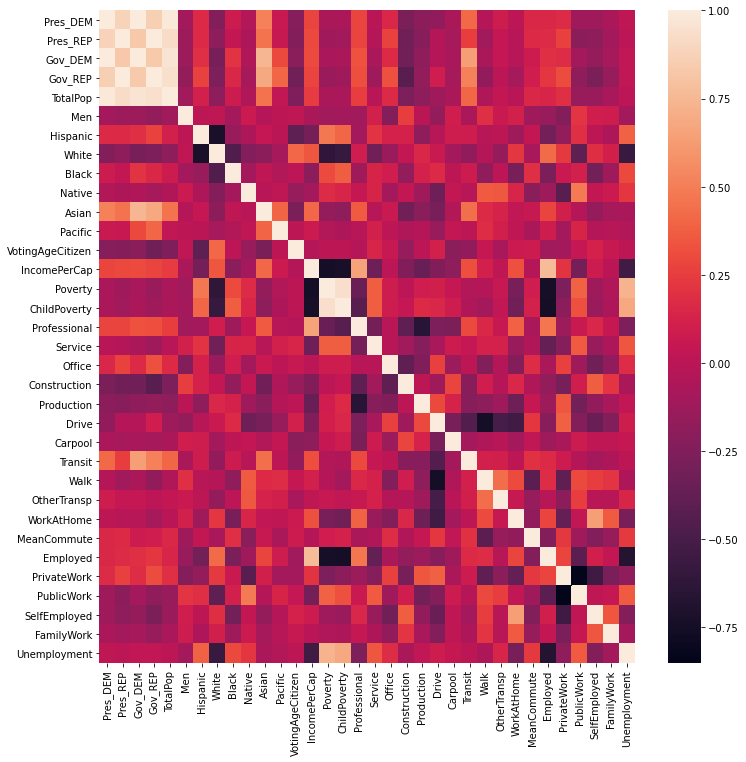

In [300]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

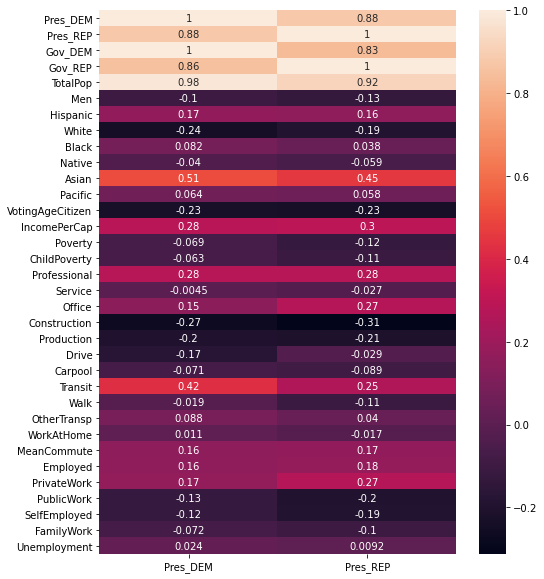

In [301]:
plt.figure(figsize=(8,10))
sns.heatmap(df.corr()[['Pres_DEM', 'Pres_REP']], annot=True)

DEM에 투표했는데 동시에 REP에 투표한 사람이 존재한다?? (0.88) ☞ 정규화가 안되었다고 판단

#### normalization

In [302]:
df_norm = df.copy()

In [303]:
# 서로 겹치지 않고 상반되는 값을 찾도록 구성

df_norm['Pres_DEM'] /= df['Pres_DEM'] + df['Pres_REP']
df_norm['Pres_REP'] /= df['Pres_DEM'] + df['Pres_REP']
df_norm['Gov_DEM'] /= df['Gov_DEM'] + df['Gov_REP']
df_norm['Gov_REP'] /= df['Gov_DEM'] + df['Gov_REP']

In [304]:
df_norm.head()

Pres_DEM  Pres_REP  Gov_DEM  Gov_REP  TotalPop  \
state   county                                                           
Alabama Autauga County  0.274423  0.725577      NaN      NaN   55036.0   
        Baldwin County  0.227317  0.772683      NaN      NaN  203360.0   
        Barbour County  0.461391  0.538609      NaN      NaN   26201.0   
        Bibb County     0.208811  0.791189      NaN      NaN   22580.0   
        Blount County   0.096523  0.903477      NaN      NaN   57667.0   

                             Men  Hispanic  White  Black  Native  ...  Walk  \
state   county                                                    ...         
Alabama Autauga County  0.488753       2.7   75.4   18.9     0.3  ...   0.6   
        Baldwin County  0.489413       4.4   83.1    9.5     0.8  ...   0.8   
        Barbour County  0.533415       4.2   45.7   47.8     0.2  ...   2.2   
        Bibb County     0.542560       2.4   74.6   22.0     0.4  ...   0.3   
        Blount County   0.494043       9.0   87.4    1.5     0.3  ...   0.4   

                        OtherTransp  WorkAtHome  MeanCommute  Employed  \
state   county                                                           
Alabama Autauga County          1.3         2.5         25.8  0.438113   
        Baldwin County          1.1         5.6         27.0  0.440239   
        Barbour County          1.7         1.3         23.4  0.338842   
        Bibb County             1.7         1.5         30.0  0.361869   
        Blount County           0.4         2.1         35.0  0.370749   

                        PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
state   county                                                              
Alabama Autauga County         74.1        20.2           5.6         0.1   
        Baldwin County         80.7        12.9           6.3         0.1   
        Barbour County         74.1        19.1           6.5         0.3   
        Bibb County            76.0        17.4           6.3         0.3   
        Blount County          83.9        11.9           4.0         0.1   

                        Unemployment  
state   county                        
Alabama Autauga County           5.2  
        Baldwin County           5.5  
        Barbour County          12.4  
        Bibb County              8.2  
        Blount County            4.9  

[5 rows x 34 columns]

- 퍼센트 비율로 표현되어 DEM과 REP가 서로 겺치지 않음

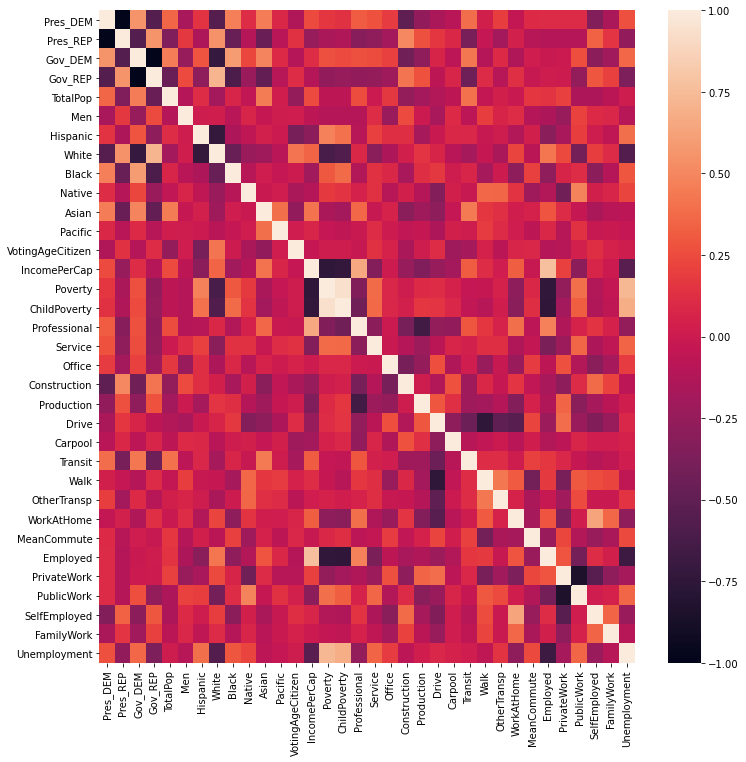

In [305]:
# normalize된 데이터로 다시 correation 확인
plt.figure(figsize=(12, 12))
sns.heatmap(df_norm.corr())

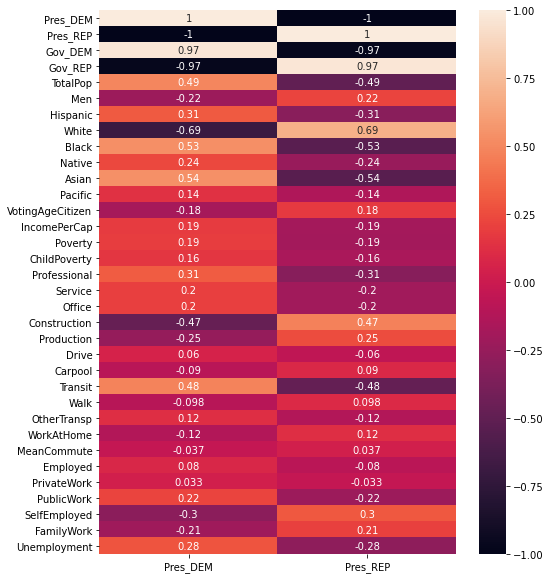

In [347]:
plt.figure(figsize=(8,10))
sns.heatmap(df_norm.corr()[['Pres_DEM', 'Pres_REP']], annot=True)

대선 REP 당에 대해 white 의 지지가 0.55로 가장 높은 상관성을 띄는 반면 DEM에선 같은 수치로 낮은 상관성을 나타냄

# joint plot

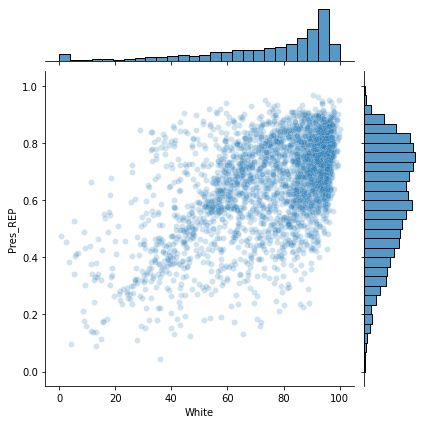

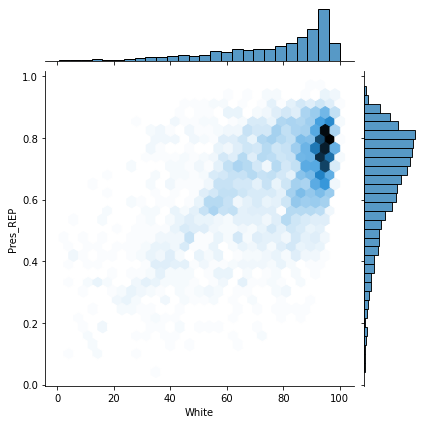

In [307]:
sns.jointplot(x='White', y='Pres_REP', data= df_norm, alpha=0.2)
sns.jointplot(x='White', y='Pres_REP', data= df_norm, kind='hex')

- White 인구 많을수록 REP에 투표하는 경향이 뚜렷하게 나타남

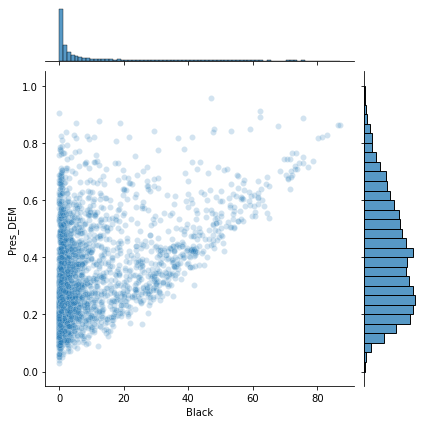

In [309]:
sns.jointplot(x='Black', y='Pres_DEM', data= df_norm, alpha=0.2)

# 5. Plotly를 이용하여 시각화하기


### Plotly의 Choropleth 데이터 포맷으로 맞추기

In [310]:
# Plotly에서 제공하는 구문 그대로 복붙하여 사용

import plotly.figure_factory as ff

# FIPS 코드 불러오기
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

# Color Scale 세팅
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

In [311]:
df_sample.head()

,LAUS Code,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%),FIPS
0,CN0100100000000,01,001,"Autauga County, AL",2016,"25,649","24,297","1,352",5.3,01001
1,CN0100300000000,01,003,"Baldwin County, AL",2016,"89,931","85,061","4,870",5.4,01003
2,CN0100500000000,01,005,"Barbour County, AL",2016,"8,302","7,584",718,8.6,01005
3,CN0100700000000,01,007,"Bibb County, AL",2016,"8,573","8,004",569,6.6,01007
4,CN0100900000000,01,009,"Blount County, AL",2016,"24,525","23,171","1,354",5.5,01009


In [312]:
state_code.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [313]:
state_map = state_code.set_index('State/District')['Postal Code']
state_map.head()

State/District
Alabama       AL
Alaska        AK
Arizona       AZ
Arkansas      AR
California    CA
Name: Postal Code, dtype: object

In [314]:
df_norm.head()

Pres_DEM  Pres_REP  Gov_DEM  Gov_REP  TotalPop  \
state   county                                                           
Alabama Autauga County  0.274423  0.725577      NaN      NaN   55036.0   
        Baldwin County  0.227317  0.772683      NaN      NaN  203360.0   
        Barbour County  0.461391  0.538609      NaN      NaN   26201.0   
        Bibb County     0.208811  0.791189      NaN      NaN   22580.0   
        Blount County   0.096523  0.903477      NaN      NaN   57667.0   

                             Men  Hispanic  White  Black  Native  ...  Walk  \
state   county                                                    ...         
Alabama Autauga County  0.488753       2.7   75.4   18.9     0.3  ...   0.6   
        Baldwin County  0.489413       4.4   83.1    9.5     0.8  ...   0.8   
        Barbour County  0.533415       4.2   45.7   47.8     0.2  ...   2.2   
        Bibb County     0.542560       2.4   74.6   22.0     0.4  ...   0.3   
        Blount County   0.494043       9.0   87.4    1.5     0.3  ...   0.4   

                        OtherTransp  WorkAtHome  MeanCommute  Employed  \
state   county                                                           
Alabama Autauga County          1.3         2.5         25.8  0.438113   
        Baldwin County          1.1         5.6         27.0  0.440239   
        Barbour County          1.7         1.3         23.4  0.338842   
        Bibb County             1.7         1.5         30.0  0.361869   
        Blount County           0.4         2.1         35.0  0.370749   

                        PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
state   county                                                              
Alabama Autauga County         74.1        20.2           5.6         0.1   
        Baldwin County         80.7        12.9           6.3         0.1   
        Barbour County         74.1        19.1           6.5         0.3   
        Bibb County            76.0        17.4           6.3         0.3   
        Blount County          83.9        11.9           4.0         0.1   

                        Unemployment  
state   county                        
Alabama Autauga County           5.2  
        Baldwin County           5.5  
        Barbour County          12.4  
        Bibb County              8.2  
        Blount County            4.9  

[5 rows x 34 columns]

In [315]:
counties = df_norm.reset_index()['county'] + ', ' + df_norm.reset_index()['state'].map(state_map)
counties

0          Autauga County, AL
1          Baldwin County, AL
2          Barbour County, AL
3             Bibb County, AL
4           Blount County, AL
                ...          
4804    Sweetwater County, WY
4805         Teton County, WY
4806         Uinta County, WY
4807      Washakie County, WY
4808        Weston County, WY
Length: 4809, dtype: object

In [316]:
counties_to_fips = df_sample.set_index('County Name/State Abbreviation')['FIPS']
counties_to_fips

County Name/State Abbreviation
Autauga County, AL         01001
Baldwin County, AL         01003
Barbour County, AL         01005
Bibb County, AL            01007
Blount County, AL          01009
                           ...  
Vega Baja Municipio, PR    72145
Vieques Municipio, PR      72147
Villalba Municipio, PR     72149
Yabucoa Municipio, PR      72151
Yauco Municipio, PR        72153
Name: FIPS, Length: 3219, dtype: object

In [317]:
fips = counties.map(counties_to_fips)
fips

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
4804    56037
4805    56039
4806    56041
4807    56043
4808    56045
Length: 4809, dtype: object

In [318]:
# 결측치 제거
fips.isna().sum()

1681

In [319]:
data = df_norm.reset_index()['Pres_DEM'][fips.notna()]
fips = fips[fips.notna()]

### Choropleth map 시각화

In [191]:
# ff.create_choropleth() 메소드를 이용하여 Choropleth 플랏하기
# Hint) 공식 레퍼런스 참조: https://plotly.com/python/county-choropleth/#the-entire-usa

fig = ff.create_choropleth(
    fips=fips, 
    values=data,
    show_state_data=False,
    colorscale=colorscale,
    binning_endpoints=list(np.linspace(0.0, 1.0, len(colorscale) - 2)),
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='USA by Voting for DEM Presient'
)

fig.layout.template = None
fig.show()

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
$ pip install geopandas==0.3.0
$ pip install pyshp==1.2.10
$ pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
$ conda install plotly
$ conda install geopandas
```

# 6. 모델 학습을 위한 데이터 전처리 

### 학습을 위한 데이터프레임 구성하기

In [320]:
df_norm.columns

Index(['Pres_DEM', 'Pres_REP', 'Gov_DEM', 'Gov_REP', 'TotalPop', 'Men',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'VotingAgeCitizen', 'IncomePerCap', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

#### 정답에 해당하는 토표 결과 칼럼을 제거하고, DEM 정당을 기준으로 y레이블 생성

In [321]:
# 결측치 제거
df_norm.dropna(inplace=True)

X = df_norm.drop(['Pres_DEM', 'Pres_REP', 'Gov_DEM', 'Gov_REP'], axis=1)
y = df_norm['Pres_DEM']

### StandardScaler를 이용해 수치형 데이터 표준화하기


In [322]:
from sklearn.preprocessing import StandardScaler

In [323]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
# scaler.fit_transform(X) 로 간소화 가능

# 스케일링을 적용하면 array의 형태로 결과나 표현되기 때문에 다시금 DF로 변환하는 과정 필요
X = pd.DataFrame(data=X_scaled, index=X.index, columns=X.columns)

In [324]:
X.head()

TotalPop       Men  Hispanic     White     Black  \
state    county                                                                
Delaware Kent County        0.651462 -0.946145  0.346057 -1.423723  1.751813   
         New Castle County  3.043033 -0.848175  0.828313 -1.695454  1.751813   
         Sussex County      0.917027 -0.818852  0.759420 -0.634409  0.622026   
Indiana  Adams County      -0.213551 -0.230718 -0.067305  0.581911 -0.432442   
         Allen County       1.870146 -0.656809  0.414951 -0.653818  0.546706   

                              Native     Asian   Pacific  VotingAgeCitizen  \
state    county                                                              
Delaware Kent County       -0.191121  0.783427 -0.393531         -0.388638   
         New Castle County -0.239442  3.218819 -0.393531         -0.665857   
         Sussex County     -0.215282  0.210394 -0.393531          0.227859   
Indiana  Adams County      -0.263602 -0.362639 -0.393531         -1.625095   
         Allen County      -0.239442  1.857865 -0.393531         -1.068441   

                            IncomePerCap  ...      Walk  OtherTransp  \
state    county                           ...                          
Delaware Kent County            0.313498  ... -0.455170    -0.337372   
         New Castle County      1.606755  ... -0.301446    -0.337372   
         Sussex County          1.122397  ... -0.506412    -0.141175   
Indiana  Adams County          -0.755470  ... -0.250204     0.447416   
         Allen County           0.224871  ... -0.608895    -0.533569   

                            WorkAtHome  MeanCommute  Employed  PrivateWork  \
state    county                                                              
Delaware Kent County         -0.325794     0.608072  0.209912    -0.063847   
         New Castle County   -0.325794     0.492385  0.801126     1.168959   
         Sussex County        0.055883     0.415259 -0.026356     0.503244   
Indiana  Adams County        -0.244006    -0.066773 -0.205611     0.971710   
         Allen County        -0.380320    -0.355993  0.707837     1.477161   

                            PublicWork  SelfEmployed  FamilyWork  Unemployment  
state    county                                                                 
Delaware Kent County          0.791294     -0.836585   -0.243581      0.265911  
         New Castle County   -0.715528     -0.999491   -0.404976      0.192397  
         Sussex County       -0.251891     -0.470046   -0.404976      0.045370  
Indiana  Adams County        -1.344751     -0.001691    0.401999     -0.285443  
         Allen County        -1.278517     -0.816222   -0.404976      0.118884  

[5 rows x 30 columns]

### 학습데이터와 테스트데이터 분리하기


In [325]:
from sklearn.model_selection import train_test_split

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### PCA를 이용해 데이터 전처리 수행하기

In [327]:
from sklearn.decomposition import PCA

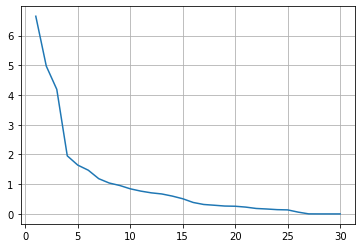

In [328]:
# PCA를 이용해 Dimensionality Reduction 수행하기

pca = PCA()
# pca = PCA(n_components=10)
pca.fit(X_train)
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
plt.grid()

In [329]:
pca = PCA(n_components=10)
pca.fit(X_train)

PCA(n_components=10)

------------------

# Regression 모델 학습하기

### LightGBM Regression 모델 학습하기

In [330]:
from lightgbm import LGBMRegressor

In [350]:
model_reg = LGBMRegressor()
# model_reg.fit(pca.transform(X_train), y_train)
model_reg.fit(X_train, y_train)

LGBMRegressor()

In [351]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from math import sqrt

In [353]:
# pred = model_reg.predict(pca.transform(X_test))
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

0.053261679672733014
0.07527410114651


In [354]:
print(classification_report(y_test > 0.5, pred > 0.5))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       146
        True       0.80      0.71      0.75        17

    accuracy                           0.95       163
   macro avg       0.88      0.84      0.86       163
weighted avg       0.95      0.95      0.95       163



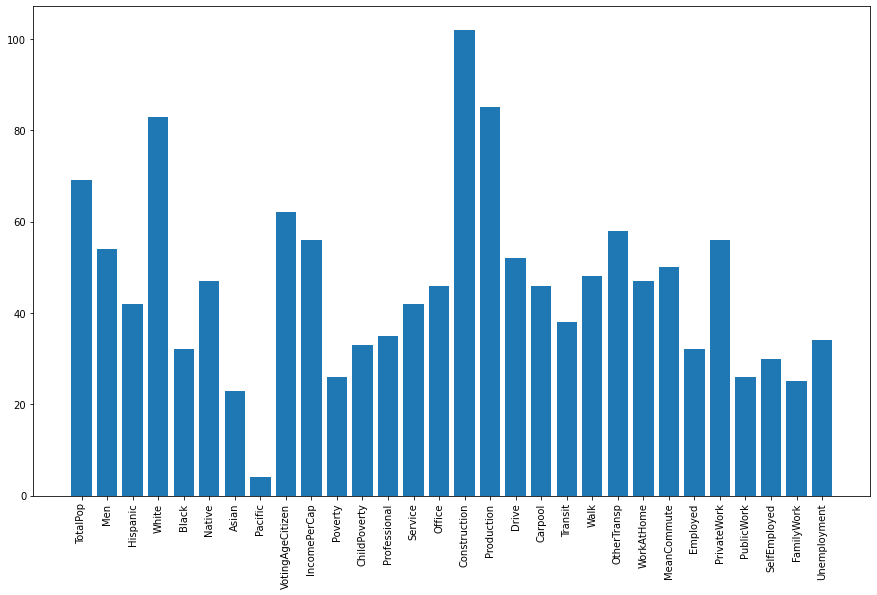

In [355]:
plt.figure(figsize=(15,9))
plt.bar(X.columns, model_reg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [367]:
from lightgbm import LGBMClassifier

In [374]:
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train>0.5)
pred = lgbm_clf.predict(X_test)

In [375]:
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
print(classification_report(y_test > 0.5, pred > 0.5))

0.292296505407722
0.3155268069514623
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       146
        True       0.92      0.65      0.76        17

    accuracy                           0.96       163
   macro avg       0.94      0.82      0.87       163
weighted avg       0.96      0.96      0.95       163



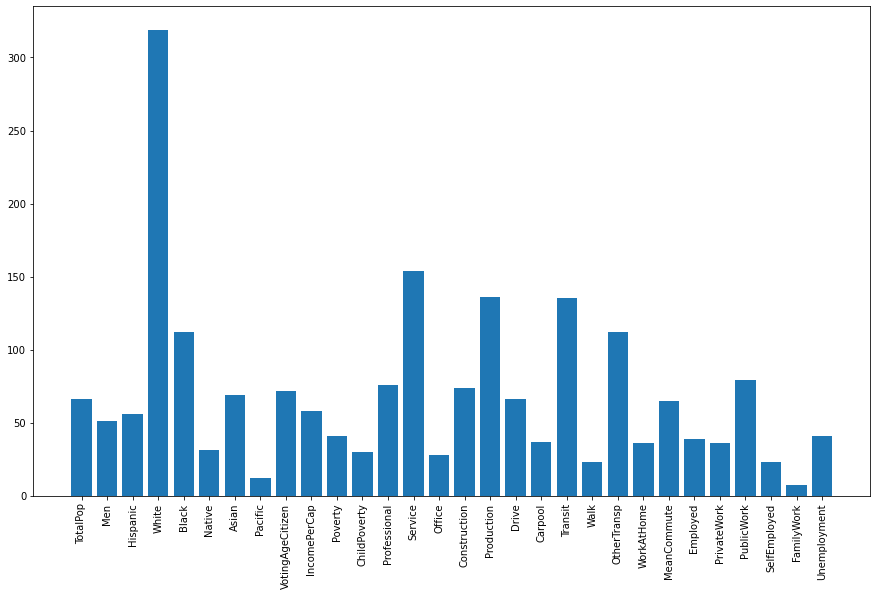

In [376]:
plt.figure(figsize=(15,9))
plt.bar(X.columns, lgbm_clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [365]:
y_train>0.5

state          county           
Utah           Sanpete County       False
Indiana        Tippecanoe County     True
North Dakota   Eddy County          False
West Virginia  Randolph County      False
Missouri       Chariton County      False
                                    ...  
               Dunklin County       False
               Jefferson County     False
Indiana        Rush County          False
Montana        Liberty County       False
Indiana        Huntington County    False
Name: Pres_DEM, Length: 379, dtype: bool

In [366]:
y_train

state          county           
Utah           Sanpete County       0.146413
Indiana        Tippecanoe County    0.503132
North Dakota   Eddy County          0.309620
West Virginia  Randolph County      0.279352
Missouri       Chariton County      0.227465
                                      ...   
               Dunklin County       0.212869
               Jefferson County     0.327514
Indiana        Rush County          0.225189
Montana        Liberty County       0.232710
Indiana        Huntington County    0.244512
Name: Pres_DEM, Length: 379, dtype: float64

------------------

## Classification 모델 학습하기


### XGBoost 모델 생성/학습하기


In [336]:
from xgboost import XGBClassifier

In [337]:
model_cls = XGBClassifier()
model_cls.fit(X_train, y_train>0.5)

[15:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\44455\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [338]:
# > 0.5 를 통해 True/False 구분 가능해짐
y_train > 0.5

state          county           
Utah           Sanpete County       False
Indiana        Tippecanoe County     True
North Dakota   Eddy County          False
West Virginia  Randolph County      False
Missouri       Chariton County      False
                                    ...  
               Dunklin County       False
               Jefferson County     False
Indiana        Rush County          False
Montana        Liberty County       False
Indiana        Huntington County    False
Name: Pres_DEM, Length: 379, dtype: bool

In [339]:
model_cls.feature_importances_

array([0.22606476, 0.00178262, 0.01576339, 0.0827414 , 0.04671214,
       0.0245585 , 0.14558448, 0.00316859, 0.02135376, 0.01152676,
       0.01362711, 0.00475654, 0.02470126, 0.01640455, 0.00644429,
       0.0282082 , 0.03059283, 0.00195676, 0.00235112, 0.05490339,
       0.02074167, 0.02917887, 0.01124306, 0.01576694, 0.00348141,
       0.04557473, 0.05362605, 0.01739527, 0.01785071, 0.02193892],
      dtype=float32)

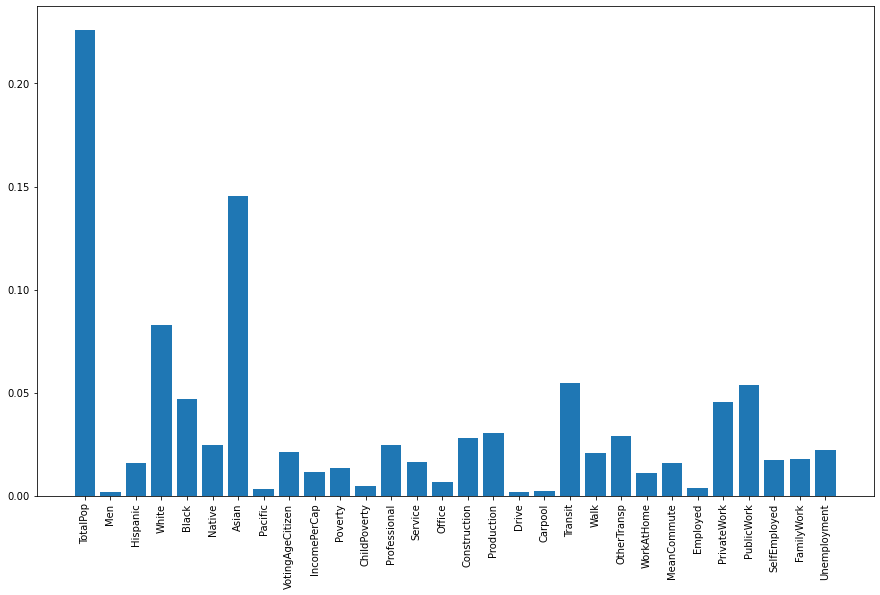

In [344]:
plt.figure(figsize=(15,9))
plt.bar(X.columns, model_cls.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [346]:
pred = model_cls.predict(X_test)
print(classification_report(y_test > 0.5, pred > 0.5))

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       146
        True       0.73      0.65      0.69        17

    accuracy                           0.94       163
   macro avg       0.85      0.81      0.83       163
weighted avg       0.94      0.94      0.94       163

